In [27]:
# from notebook.services.config import ConfigManager

# cm = ConfigManager()
# cm.update(
#     "livereveal",
#     {
#         "width": 1920,
#         "height": 1080,
#         "scroll": True,
#     },
# )

# Week 02: Monday, AST 5011: Astrophysical Systems

## Virial Theorem, Constant-Density Model, Energy Generation/Transport, Dimensional Analysis, and the Main Sequence 

### Michael Coughlin <cough052@umn.edu>

With contributions totally ripped off from Carl Fields (UA), Mike Zingale (SUNY), Cole Miller (UMD), and Abi Nolan (Purdue).


# Self-Gravitating Objects

## What Does “Self-Gravitating” Mean?

We often treat gravity as an externally imposed constant field $g = \mathrm{const}$.
This is *not* true for stars: a star’s gravity is generated by its own mass distribution.

We will model a star as a self-gravitating fluid under the assumptions:

- No rotation
- Total mass $$M_\star = \mathrm{const}$$ (no mass loss)

The governing equations are conservation laws for:

- Mass
- Momentum
- Energy

These are the Euler equations.

---

## Euler Equations (Fluid Description)

### Conservation Law (Generic Form)

For a conserved quantity $u$ with flux $\mathbf{F}$:

$$
\partial_t u + \nabla \cdot \mathbf{F} = 0.
$$

### Euler Equations in 1D (Cartesian \(x\))

#### Mass (Continuity Equation)
$$
\partial_t \rho + \partial_x (\rho v) = 0.
$$

#### Momentum
$$
\partial_t (\rho v) + \partial_x (\rho v^2 + P) = 0.
$$

#### Energy
$$
\partial_t \left( \tfrac{1}{2}\rho v^2 + \varepsilon \right)
+ \partial_x \left[v\left(\tfrac{1}{2}\rho v^2 + \varepsilon + P\right)\right] = 0.
$$

Here:
- $\varepsilon$ is the internal energy density
- An equation of state (EOS) is required to relate P, $\rho$, and $\varepsilon$

---

## Momentum Conservation with Gravity

### Lagrangian (Co-moving) Form

In co-moving coordinates, the momentum equation becomes:

$$
\rho \frac{d\vec v}{dt} = -\nabla P + \rho \vec g.
$$

For a self-gravitating, spherically symmetric star:

$$
\vec g = -\frac{G m(r)}{r^2} \, \hat r.
$$

---

## Dynamical (Free-Fall) Timescale

Suppose pressure support were suddenly removed. The star would collapse under gravity.

In the radial direction:
$$
\frac{d^2 r}{dt^2} = -\frac{G M}{R^2}.
$$

A characteristic **free-fall timescale** is then:

$$
t_{\rm ff} \sim \sqrt{\frac{R^3}{G M}}.
$$

Using the mean density \(\langle \rho \rangle = \tfrac{3M}{4\pi R^3}\):

$$
t_{\rm ff} \sim \frac{1}{\sqrt{G \langle \rho \rangle}}.
$$

**Key point:** Stars evolve on timescales much longer than $t_{\rm ff}$, so they must be extremely close to hydrostatic equilibrium.

# The Virial Theorem

## Motivation

The virial theorem provides a deep and surprisingly general connection between dynamics and energetics in self-gravitating systems. For stars, it allows us to relate gravity, pressure support, internal energy, and stability *without* knowing the detailed internal structure.

This makes it one of the most powerful tools in stellar astrophysics.

## Hydrostatic Equilibrium 

The virial theorem is the *integrated consequence* of hydrostatic equilibrium.
It relates gravity to internal (thermal or radiation) energy.

$$
\frac{dP}{dr} = -\rho \frac{G m(r)}{r^2},
\qquad
\frac{dm}{dr} = 4\pi r^2 \rho(r).
$$

---

## Statement of the Virial Theorem

Following the discussion in *Hansen, Kawaler & Trimble (HKT) §1.3*, we arrive at the form:

$$
\frac{1}{2} \frac{d^2 I}{dt^2} = 2K + \Omega
$$

where:

- $ I \equiv \sum_i m_i r_i^2 $ is the moment of inertia of the system
- K is the total kinetic energy
- $\Omega$ is the gravitational potential energy

All quantities are summed over the entire star.

---

## Physical Interpretation

- The left-hand side measures how the size of the system is changing in time.
- The right-hand side compares motion (kinetic energy) against gravity.

This equation is exact for any bound system of particles interacting via gravity.

---

## Virial Equilibrium

For a star in a steady, long-lived state:

$$
\frac{d^2 I}{dt^2} = 0
$$

This defines virial equilibrium, giving:

$$
2K + \Omega = 0
$$

or equivalently:

$$
K = -\frac{1}{2} \Omega
$$

### Key Consequences

- The total energy is

$$
E = K + \Omega = \frac{1}{2} \Omega = -K
$$

- Bound gravitational systems have negative total energy.
- If gravity becomes stronger (more negative $\Omega$), the system must increase its kinetic energy.

---

## Connection to Temperature

In a star, most kinetic energy is thermal:

$$
K \sim \frac{3}{2} NkT
$$

Thus, via the virial theorem:

- Compression heats the star
- Expansion cools the star

This is the origin of a star’s negative heat capacity.

> **In-class question:** What happens to the temperature of a star if it loses energy by radiation?


<details>
<summary>Answer</summary>

Its temperature increases (at least in its interior).

</details>

---

## Order-of-Magnitude Estimate

Using:

$$
\Omega \sim -\frac{GM^2}{R}
$$

we find:

$$
K \sim \frac{GM^2}{2R}
$$

This estimate alone already tells us:

- Typical interior temperatures
- Why nuclear fusion is required
- Why stars contract as they cool

All without solving the full stellar structure equations.

---

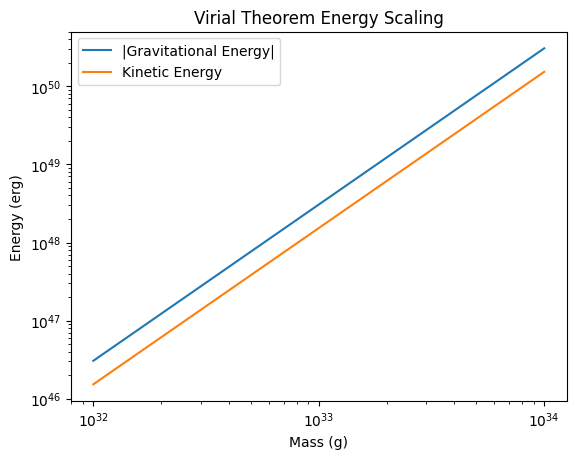

In [28]:
# Gravitational vs Thermal Energy Scaling

import numpy as np
import matplotlib.pyplot as plt

G = 6.67e-8  # cgs
kB = 1.38e-16  # erg/K
m_p = 1.67e-24  # g

M = np.logspace(32, 34, 100)  # g
R = np.logspace(9, 11, 100)  # cm

Omega = -G * M**2 / R.mean()
K = -0.5 * Omega

plt.loglog(M, np.abs(Omega), label="|Gravitational Energy|")
plt.loglog(M, K, label="Kinetic Energy")
plt.xlabel("Mass (g)")
plt.ylabel("Energy (erg)")
plt.legend()
plt.title("Virial Theorem Energy Scaling")
plt.show()


> **In-class question:** Why does changing the stellar radius shift both curves together?

<details>
<summary>Answer</summary>

If the star contracts, U becomes more negative (gravitational energy deepens), K increases (thermal energy rises, by virial theorem). If the star expands, U becomes less negative and K decreases.

</details>

## In-class Exercise: Virial Theorem and Stellar Heating

In this problem, you will explore how gravitational binding energy and thermal energy scale with stellar mass and radius, and connect this to the virial theorem and negative heat capacity.

Recall:
$$
\Omega \sim -\frac{G M^2}{R}, \qquad K = -\frac{1}{2}\Omega
$$

### Part A: Energy Scaling

1. Using the expressions above, compute the gravitational potential energy $\Omega$ and kinetic energy $K$ for a range of stellar masses.
2. Assume a fixed stellar radius and plot:
   - $|\Omega|$ vs mass
   - $K$ vs mass
3. Verify that both energies scale as $M^2$.

### Part B: Effect of Contraction

Now fix the stellar mass and vary the radius.

1. Plot $|\Omega|$ and $K$ as a function of radius.
2. Describe what happens to the kinetic energy as the star contracts.
3. Explain how this relates to the statement: “A star heats up as it loses energy.”

### Part C: Conceptual Question

Using your plots and the virial theorem, answer:

Why does a self-gravitating system have negative heat capacity?


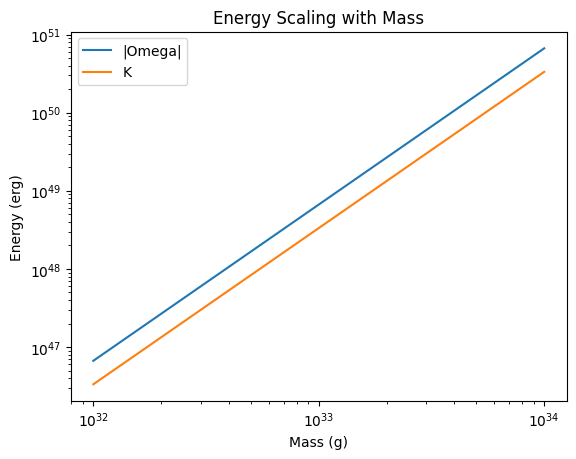

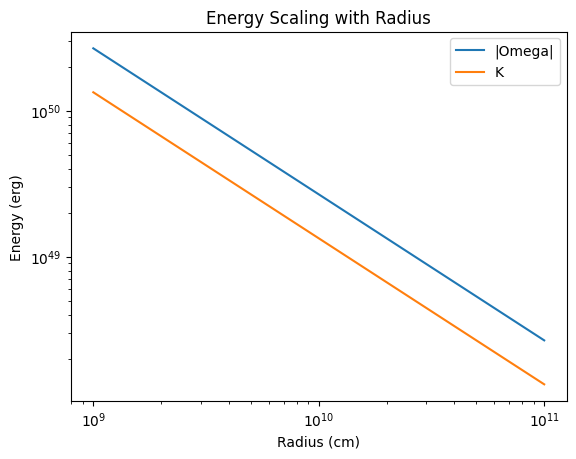

In [29]:
import numpy as np
import matplotlib.pyplot as plt

G = 6.67e-8  # cgs

# Part A: Vary mass, fix radius
M = np.logspace(32, 34, 100)  # g
R_fixed = 1e10  # cm

Omega_M = -G * M**2 / R_fixed
K_M = -0.5 * Omega_M

plt.loglog(M, np.abs(Omega_M), label="|Omega|")
plt.loglog(M, K_M, label="K")
plt.xlabel("Mass (g)")
plt.ylabel("Energy (erg)")
plt.legend()
plt.title("Energy Scaling with Mass")
plt.show()

# Part B: Vary radius, fix mass
R = np.logspace(9, 11, 100)  # cm
M_fixed = 2e33  # g (about 1 solar mass)


# Compute gravitational energy
Omega_R = -G * M_fixed**2 / R

# Compute kinetic energy from Virial theorem
K_R = -0.5 * Omega_R

plt.loglog(R, np.abs(Omega_R), label="|Omega|")
plt.loglog(R, K_R, label="K")
plt.xlabel("Radius (cm)")
plt.ylabel("Energy (erg)")
plt.legend()
plt.title("Energy Scaling with Radius")
plt.show()

<details>
<summary>Solution</summary>

### Part A: Energy Scaling with Mass

Using
$$
\Omega = -\frac{G M^2}{R}, \qquad K = -\frac{1}{2}\Omega,
$$
and holding $R$ fixed, both $|\Omega|$ and $K$ scale as
$$
|\Omega| \propto M^2, \qquad K \propto M^2.
$$

This appears in the log–log plot as straight lines with slope 2.

---

### Part B: Effect of Contraction

Holding $M$ fixed and decreasing $R$,
$$
|\Omega| \propto \frac{1}{R}, \qquad K \propto \frac{1}{R}.
$$

As the star contracts:
- the gravitational potential energy becomes more negative
- the kinetic (thermal) energy increases

Thus, contraction heats the star.

#### Key Python Lines
```python
Omega_R = -G * M_fixed**2 / R
K_R = -0.5 * Omega_R
```

---

### Part C: Negative Heat Capacity

From the virial theorem,
$$
E = K + \Omega = -K.
$$

If the star loses energy ($E$ decreases), its kinetic energy $K$ must increase.
Since $K$ is primarily thermal,
the temperature of the star increases as it loses energy.

This counterintuitive behavior is the defining feature of a self-gravitating system
with negative heat capacity.

</details>


## Limits of Applicability

The simple virial form assumes:

- The system is bound
- Surface terms are negligible
- No rapid mass loss or violent dynamics

It does *not* apply directly to:

- Supernova explosions
- Strongly driven stellar winds
- Rapidly accreting or eruptive systems

---

## Why the Virial Theorem Matters

The virial theorem:

- Explains why stars shine by gravitational contraction (Kelvin–Helmholtz phase)
- Predicts negative heat capacity
- Sets the scale for stellar temperatures
- Applies equally to stars, star clusters, galaxies, and dark-matter halos

It is one of the few tools in astrophysics that is both simple and profound.

---

## Looking Ahead

Next, we will use the virial theorem to understand:

- Kelvin–Helmholtz contraction timescales
- The onset of nuclear burning
- Stability of self-gravitating objects

This will connect dynamics directly to stellar evolution.


# Equations of Stellar Structure

## Motivation

We are now close to being able to construct simple models of stars. To do this, we need a complete set of equations that relate:

- Mass and radius
- Pressure and gravity
- Energy generation and transport
- Thermodynamic state of the gas

Once assembled, these equations allow us (in principle) to solve for the internal structure of a star. Over the next several lectures, we will focus on the individual physical ingredients: energy generation, equations of state, and opacities.

---

## Energy Transport: Physical Picture

We begin with energy transfer. What we care about is the net flux of energy at a given location inside the star.

Because we assume spherical symmetry, the flux can only have a radial component.

In stellar interiors, particle mean free paths are typically very small compared to the stellar radius. Energy is therefore transported by diffusion: particles scatter many times before escaping.

> **In-class question:** If the energy density were constant everywhere in a star, would there be any net energy flux?

<details>
<summary>Answer</summary>

No — equal amounts of energy would flow inward and outward.

</details>

This immediately tells us that flux must depend on the gradient of the energy density:

$$
F \propto \frac{dE}{dr}
$$

> **In-class question:** Should the flux increase or decrease if the particle mean free path $\ell$ increases?

<details>
<summary>Answer</summary>

A larger mean free path samples a larger energy difference, so the flux increases.

</details>

Because opacity \(\kappa\) is inversely related to mean free path, this suggests:

$$
F \propto \kappa^{-1} \frac{dE}{dr}
$$

> **In-class question:** If outward flux is positive, what sign must appear in front of the gradient?

<details>
<summary>Answer</summary>

The sign must be negative, because energy must decrease outward.

</details>

---

## Radiative Energy Transport

We now specialize to radiation as the energy-carrying agent. Other mechanisms exist (convection, conduction), but radiation dominates large fractions of many stars.

The radiation energy density is:

$$
E = aT^4
$$

Including the effects of diffusion, the radiative flux is:

$$
F_r = -\frac{c}{3\kappa\rho} \frac{d(aT^4)}{dr}
$$

Multiplying by the surface area of a sphere gives the luminosity:

$$
L_r = -\frac{4\pi r^2 c}{3\kappa\rho} \frac{d(aT^4)}{dr}
$$

This is the radiative energy transport equation.

---

## Physical Meaning of the Terms

- $\kappa$ has units of $$\mathrm{cm^2\,g^{-1}}$$ and represents the opacity.
- $\frac{1}{\kappa\rho}$ has units of length and is the mean free path.
- The factor of $$c$$ appears because radiation travels at the speed of light.

> **In-class question:** Why does faster particle speed imply larger energy flux, all else equal?

<details>
<summary>Answer</summary>

Higher energy density (hotter) → more energy per photon

Longer mean free path (lower opacity) → photons carry energy farther before scattering

Large temperature gradients → more net energy flow

</details>

---

## Lagrangian Form

Using:

$$
dM_r = 4\pi r^2 \rho \, dr
$$

we can rewrite the transport equation as:

$$
L_r = -\frac{(4\pi r^2)^2 c}{3\kappa} \frac{d(aT^4)}{dM_r}
$$

This form is often more convenient for stellar structure calculations.

---

## Opacity: Power-Law Approximation

Although real opacities are complicated, they are often approximated as:

$$
\kappa = \kappa_0 \, \rho^n T^{-s}
$$

Examples:

- **Thomson scattering:** $$n = 0, \; s = 0$$
- **Kramers opacity:** $$n = 1, \; s = 3.5$$

These approximations are valid only over limited ranges of density and temperature.

---

## Equation of State

We also require a relation between pressure, density, and temperature:

$$
P = P_0 \, \rho^{\chi_\rho} T^{\chi_T}
$$

For an ideal gas:

$$
\chi_\rho = 1, \qquad \chi_T = 1
$$

Similarly, energy generation is often written as:

$$
\epsilon = \epsilon_0 \, \rho^\lambda T^\nu
$$

All of these are approximations, but they are extremely useful.

---

## The Four Equations of Stellar Structure

Together, we arrive at four fundamental equations:

### Mass Conservation

$$
\frac{dM_r}{dr} = 4\pi r^2 \rho
$$

### Hydrostatic Equilibrium

$$
\frac{dP}{dr} = -\frac{G M_r \rho}{r^2}
$$

### Energy Generation

$$
\frac{dL_r}{dr} = 4\pi r^2 \rho \epsilon
$$

### Energy Transport (Radiative)

$$
L_r = -\frac{4\pi r^2 c}{3\kappa\rho} \frac{d(aT^4)}{dr}
$$

These four equations, combined with boundary conditions, define a stellar model.

---


## In-class Exercise: Radiative Energy Transport and Temperature Gradients

In this exercise, you will explore how radiative energy transport sets the temperature gradient inside a star.

Starting from the radiative transport equation:
$$
L_r = -\frac{4\pi r^2 c}{3\kappa\rho} \frac{d(aT^4)}{dr}.
$$

---

### Part A: Rearranging the Transport Equation

1. Starting from the equation above, derive an expression for $dT/dr$ in terms of
   $L_r$, $r$, $\kappa$, $\rho$, and $T$.
2. Identify which quantities act to steepen the temperature gradient.

---

### Part B: Scaling with Radius

Assume:
- constant opacity $\kappa$,
- constant density $\rho$,
- luminosity increases outward as $L_r \propto r^3$.

1. Using your expression for $dT/dr$, determine how the temperature gradient scales with radius.
2. Explain why the gradient must be steep near the stellar center.

---

### Part C: Numerical Exploration

Using the code below:

1. Compute the luminosity profile $L_r(r)$ for a given temperature profile $T(r)$.
2. Identify where $|dT/dr|$ is largest.
3. Verify that this corresponds to the smallest radii.

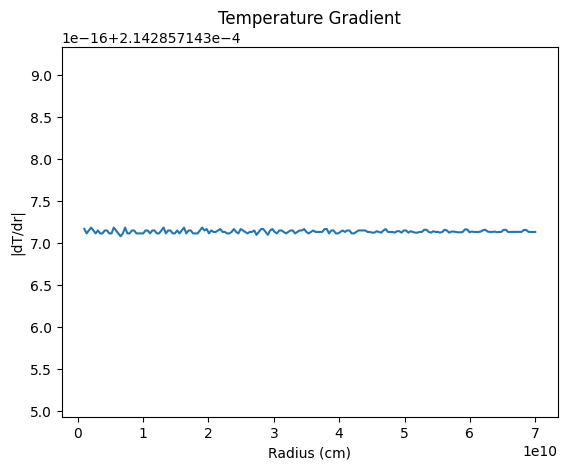

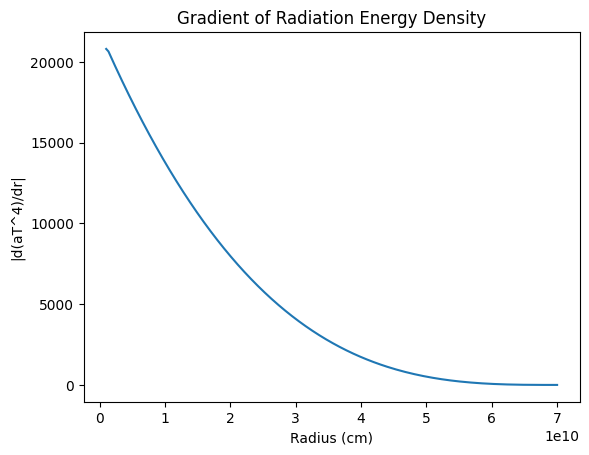

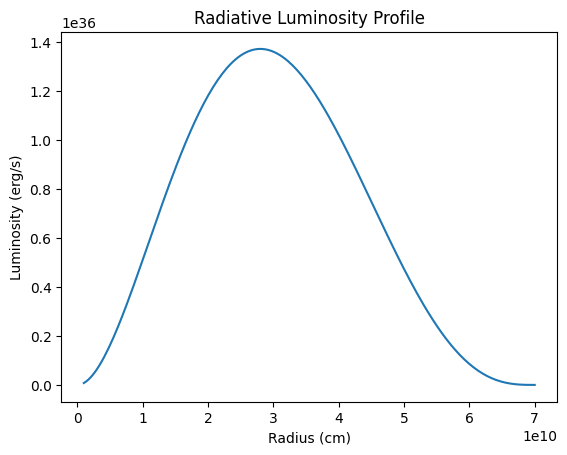

In [30]:
import numpy as np
import matplotlib.pyplot as plt

r = np.linspace(1e9, 7e10, 200)

# simple illustrative temperature profile
T = 1.5e7 * (1 - r / r.max()) + 5e3

a = 7.56e-15
c = 3e10
kappa = 0.34
rho = 1.0

# Compute d(aT^4)/dr
dT4_dr = np.gradient(a * T**4, r)

# Compute radiative luminosity profile
L = -(4 * np.pi * r**2 * c) / (3 * kappa * rho) * dT4_dr

plt.plot(r, np.abs(np.gradient(T, r)))
plt.xlabel("Radius (cm)")
plt.ylabel("|dT/dr|")
plt.title("Temperature Gradient")
plt.show()

plt.plot(r, np.abs(dT4_dr))
plt.xlabel("Radius (cm)")
plt.ylabel("|d(aT^4)/dr|")
plt.title("Gradient of Radiation Energy Density")
plt.show()

plt.plot(r, L)
plt.xlabel("Radius (cm)")
plt.ylabel("Luminosity (erg/s)")
plt.title("Radiative Luminosity Profile")
plt.show()

<details>
<summary>Solution</summary>

### Part A

Starting from
$$
L_r = -\frac{4\pi r^2 c}{3\kappa\rho} \frac{d(aT^4)}{dr},
$$
we obtain
$$
\frac{dT}{dr} \sim - \frac{3\kappa\rho L_r}{16\pi a c r^2 T^3}.
$$

The gradient steepens for:
- larger luminosity,
- higher opacity or density,
- smaller radius,
- lower temperature.

---

### Part B

If $L_r \propto r^3$, then
$$
\frac{dT}{dr} \propto \frac{r^3}{r^2} \propto r.
$$

Although the gradient vanishes exactly at $r=0$, it increases rapidly near the center because luminosity is generated in a very small volume and must be transported through a small area.

---

### Part C

The numerical calculation shows that $|dT/dr|$ is largest at small radii and decreases outward, consistent with the analytic scaling.

#### Key Python Lines

```python
dT4_dr = np.gradient(a*T**4, r)
L = -(4 * np.pi * r**2 * c / (3 * kappa * rho)) * dT4_dr
```

---

### Part D

Near the stellar center:
- energy generation is strongest,
- luminosity rises rapidly,
- the transport area is small,
- densities are high.

Together, these require a steep temperature gradient to carry the outward energy flux.

</details>

# Dimensional Analysis and Homology Relations

## Philosophy

Homology relations assume that stars are scaled versions of a single reference star, with:

- Identical composition
- Identical microphysics
- No preferred physical scale

This implies that many quantities must be **power laws**.

> **Key idea:** Scale-free systems imply power-law relations.

---

## Homologous Scaling

If a reference star has mass $$M_0$$ and radius $$R_0$$, we assume:

$$
r = \frac{R}{R_0} r_0, \qquad M_r = \frac{M}{M_0} M_{r,0}
$$

Assuming:

$$
R \propto M^{\alpha_R}, \qquad \rho \propto M^{\alpha_\rho}
$$

The mass equation implies:

$$
\alpha_\rho + 3\alpha_R = 1
$$

---

## Example: Main Sequence Scaling

For moderately massive main-sequence stars:

- Electron scattering opacity
- Ideal gas equation of state
- CNO-cycle hydrogen burning

Homology predicts:

$$
\frac{R}{R_\odot} \propto \left(\frac{M}{M_\odot}\right)^{0.78}, \qquad
\frac{L}{L_\odot} \propto \left(\frac{M}{M_\odot}\right)^3
$$

Empirically, the luminosity exponent is closer to $$3.5$$ — remarkably good agreement given the assumptions.

---

## Main-Sequence Lifetime Estimate

Assuming a fixed fraction of mass is available for fusion:

$$
\tau_{\rm MS} \propto \frac{M}{L}
$$

Using the empirical relation:

$$
\tau_{\rm MS} \approx 10^{10} \left(\frac{M}{M_\odot}\right)^{-2.5} \, \mathrm{yr}
$$

---

> **In-class question:** Why do massive stars live such short lives despite having more fuel?

<details>
<summary>Answer</summary>

From the energy generation equation:  
$\frac{dL_r}{dr} = 4 \pi r^2 \rho \, \epsilon$  

- Massive stars have much higher central temperatures → fusion rates $\epsilon$ increase steeply (often $\epsilon \sim T^4$ or stronger).  
- Even though they have more fuel (larger $M_r$), they burn it much faster.  
- Hydrostatic equilibrium requires a large pressure → high T → high luminosity $L_r$ → rapid energy loss.  

e.g. massive stars live shorter lives because their fuel consumption outpaces their larger fuel supply.

</details>

---

## Limitations of Homology

Homology relations fail when:

- Composition varies
- Degeneracy pressure dominates
- Radiation pressure becomes important
- Opacities change rapidly

> **In-class question:** Which assumptions above break first for very low-mass stars? Very high-mass stars?

<details>
<summary>Answer</summary>

- Very low-mass stars (~0.1 M☉):  
  - The radiative transport assumption often breaks → cores become fully convective, so  
  $L_r = -\frac{4 \pi r^2 c}{3 \kappa \rho} \frac{d(aT^4)}{dr}$
  no longer applies.  
  - Energy transport is dominated by convection, not radiation diffusion.

- Very high-mass stars (>20 M☉):  
  - Hydrostatic equilibrium and opacity assumptions can break in outer layers.  
  - Radiation pressure becomes comparable to gas pressure, so  
  $\frac{dP}{dr} = - \frac{G M_r \rho}{r^2}$  
  may need modifications.  
  - Strong stellar winds and instabilities violate the simple 1D structure equations.

</details>

## In-class Exercise: Dimensional Analysis and Homology Scaling

In this exercise, you will use dimensional analysis and homology arguments to derive basic stellar scaling relations and explore their limitations.

Recall that homology assumes:
- identical composition and microphysics,
- no preferred physical scale,
- stars differ only by an overall rescaling of mass and radius.

---

### Part A: Density and Radius Scaling

Assume the stellar radius and density scale with mass as:
$$
R \propto M^{\alpha_R}, \qquad \rho \propto M^{\alpha_\rho}.
$$

1. Starting from mass conservation,
   $$
   M \sim \rho R^3,
   $$
   derive a constraint relating $\alpha_R$ and $\alpha_\rho$.
2. Explain why only one of these exponents is independent.

---

### Part B: Luminosity Scaling

Assume:
- energy generation per unit mass scales as
  $$
  \epsilon \propto \rho^\lambda T^\nu,
  $$
- luminosity scales as
  $$
  L \sim M \epsilon.
  $$

1. Using dimensional arguments, explain why the luminosity must be a power law in mass.
2. If $L \propto M^3$, estimate how the luminosity changes when the mass doubles.

---

### Part C: Main-Sequence Lifetime

Assume a fixed fraction of the stellar mass is available for nuclear burning.

1. Show that the main-sequence lifetime scales as
   $$
   \tau_{\rm MS} \propto \frac{M}{L}.
   $$
2. Using $L \propto M^{3.5}$, determine how the lifetime changes for a star with
   $2 M_\odot$ compared to the Sun.

---

### Part D: Breakdown of Homology

For each case below, identify which homology assumption fails and why:

1. Very low-mass stars  
2. Very high-mass stars

Relate your answer to changes in pressure support, opacity, or energy transport.


<details>
<summary>Solution</summary>

### Part A

From mass conservation,
$$
M \sim \rho R^3,
$$
so
$$
M \propto M^{\alpha_\rho + 3\alpha_R}.
$$

This implies
$$
\alpha_\rho + 3\alpha_R = 1.
$$

Only one exponent is independent because fixing the mass scaling fixes the density–radius relationship.

---

### Part B

In a scale-free system, all quantities must be power laws.

Since
$$
L \sim M \epsilon,
$$
and $\epsilon$ depends on $\rho$ and $T$, which themselves scale with mass, the luminosity must scale as
$$
L \propto M^n
$$
for some exponent $n$.

If $L \propto M^3$, then doubling the mass increases the luminosity by a factor of $2^3 = 8$.

---

### Part C

If a fixed fraction of mass is available for fusion,
$$
\tau_{\rm MS} \sim \frac{\text{fuel}}{\text{rate of consumption}} \sim \frac{M}{L}.
$$

With $L \propto M^{3.5}$,
$$
\tau_{\rm MS} \propto M^{-2.5}.
$$

A $2 M_\odot$ star therefore has a lifetime shorter than the Sun’s by a factor of
$$
2^{2.5} \approx 6.
$$

---

### Part D

Very low-mass stars:
- Energy transport becomes convective rather than radiative.
- The radiative diffusion assumption breaks first.

Very high-mass stars:
- Radiation pressure becomes comparable to gas pressure.
- Opacities change and strong winds appear.
- Hydrostatic equilibrium and simple opacity assumptions break down.

In both cases, the system is no longer scale-free, so homology fails.

</details>


# The Constant-Density Model

For the following analysis we will make the assumption that the central density is the density throughout the entire star, $\rho = \rho_c = $ constant and the $c$ subscript denotes the center. 

In HKT 1.4, we saw that making this approximation allows us to, with some "trivial" algebra come up with an equation for the central pressure (_under the above assumption_)

$$
P_c = \frac{3}{8 \pi} \frac{GM^2_{\star}}{R^2_{\star}} = 
1.34 \times 10^{15} \left ( \frac{M_{\star}}{M_{\odot}} \right )^2 \left ( \frac{R_{\star}}{R_{\odot}} \right )^{-4} (\textup{dyne \ cm}^{-2})~.
$$

## Calculation of Molecular Weights

Some definitions and vocabulary:

- $n$ - the number of free particles in a gas
- $Z$ - nuclear charge
- $A$ - nuclear mass number in (amu)
- $X$ - fraction by mass of a species (aka mass fraction)
- $n_{I,i}$ - the ion number density in units of cm$^{-3}$ of a given species $i$

The ion number density takes the form of (HKT 1.40)

$$
n_{I,i} = \frac{(\textup{mass / unit volume of species } i)}{(\textup{mass of 1 ion of species } i)} \equiv
\frac{\rho X_{i} N_{\textup{A}}}{A_{i}}
$$

Taking a sum over all ions gives the and defining $\mu_{I}$ as the total mean molecular weight of ions, 
we have the ion number density for all ions as

the ion number density for all ions

$$
n_{I} = \frac{\rho N_{A}}{\mu_{I}}
$$

Here, $N_{A} = 6.022137\times10^{-23}$ mole$^{-1}$.

As such, we can rewrite 

mean molecular weight of ions

$$
\mu_{I} = \left [ \Sigma_{i} \frac{X_{i}}{A_{i}} \right ]^{-1}
$$

Following a similar derivation, we can also define the mean molecular weight per free electron,

mean molecular weight per free electron

$$
\mu_{e} = \left [ \Sigma_{i} \frac{Z_{i} X_{i} y_{i}}{A_{i}} \right ]^{-1}
$$

where $y_{i}$ is the ionization fraction, a value of $y_{i}=1$ means the gas is completely ionized while $y_{i}=0$ implies the gas is completely neutral. 

We finally arrive at expressions for the total mean molecular weight,

total mean molecular weight 

$$
\mu = \left [ \frac{1}{\mu_{I}} + \frac{1}{\mu_{e}} \right ]^{-1}
$$


with $n = n_{I} + n_{e} = \frac{\rho N_{\rm{A}}}{\mu}$

### Some Naming Conventions and Approximations

The mass fractions $X_{i}$ for often defined as $X$ for $^{1}$H and $Y$ for $^{4}$He and all else referred to as "metals" denoted by $Z$ (not ion charge!).

This leads to the following result for the composition of a star, $X+Y+Z=1$. 

Now, lets consider some scenarios where we can approximate values for the molecular weights.

When $X$,$Y$, and $Z$ are completely ionized $y_{i}=1$ and $Z \ll 1$ (metals are a small mass fraction)

$$
\mu_{e} \approx \frac{2}{1+X}
$$

When using the same assumptions as above and the fact that Z is small compared the $\left < A \right >$

$$
\mu_{I} \approx \frac{4}{1+3X}
$$

Combining these results leads to an approximate total mean molecular weight

$$
\mu \approx \frac{4}{3+5X}
$$

### Energy Generation and Transport

Some definitions:

- $\epsilon$ - energy generation rate (erg g$^{-1}$ s$^{-1}$)
- $\kappa$ - lets you know how the flow of radiation is hindered by the medium through which it passes (cm$^{-2}$ g$^{-1}$)

The energy equation 

$$
\frac{d L}{dr} = 4 \pi r^2 \rho \epsilon
$$

or in Lagrangian form: 

$$
\frac{d L}{dm} = \epsilon
$$

### Stellar Dimensional Analysis 

In this section, we found the Mass-Luminosity relationship for stars with masses greater than about one solar mass,

$$
\frac{R}{R_{\odot}} \approx \left ( \frac{M}{M_{\odot}} \right )^{0.75}
$$

$$
\frac{L}{L_{\odot}} \approx \left ( \frac{M}{M_{\odot}} \right )^{3.5}
$$



### Evolutionary Lifetimes on the Main Sequence 

$$
t_{\rm{nuc}} \approx 10^{10} \left ( \frac{M}{M_{\odot}} \right ) \left ( \frac{L}{L_{\odot}} \right )^{-1} (\rm{years})
$$

or using the mass-luminosity relationship, 

$$
t_{\rm{nuc}} \approx 10^{10} \left ( \frac{M}{M_{\odot}} \right )^{-2.5} (\rm{years})
$$

## In-class Exercise: Stellar Molecular Weights

### Part A: Single Calculation (Manual)

Using the equations:

$$
\mu_I = \left[ \sum_i \frac{X_i}{A_i} \right]^{-1}, \quad
\mu_e = \left[ \sum_i \frac{Z_i X_i y_i}{A_i} \right]^{-1}, \quad
\mu = \left[ \frac{1}{\mu_I} + \frac{1}{\mu_e} \right]^{-1},
$$

compute $\mu_I$, $\mu_e$, and $\mu$ for a fully ionized gas with the following composition:

| Species | Mass fraction | A  | Z |
|---------|---------------|----|---|
| H       | X = 0.70      | 1  | 1 |
| He      | Y = 0.28      | 4  | 2 |
| Metals  | Z = 0.02      | 12 | 6 |

Assume complete ionization ($y_i = 1$).  

**Questions:**

1. Compute $\mu_I$ using the sum over $X_i / A_i$.  
2. Compute $\mu_e$ using the sum over $Z_i X_i y_i / A_i$.  
3. Compute the total mean molecular weight $\mu$.  
4. Compare your values to approximate formulas for a Sun-like composition:

$$
\mu_I \approx \frac{4}{1 + 3X}, \quad
\mu_e \approx \frac{2}{1 + X}, \quad
\mu \approx \frac{4}{3 + 5X}.
$$


### Part B: Python Calculation

Write a Python function that takes arbitrary $X$, $Y$, $Z$ values and computes:

- $\mu_I$ — mean molecular weight per ion  
- $\mu_e$ — mean molecular weight per free electron  
- $\mu$ — total mean molecular weight  

Use the exact formulas:

$$
\mu_I = \left[\frac{X}{1} + \frac{Y}{4} + \frac{Z}{\langle A \rangle_{\rm metals}}\right]^{-1}
$$

$$
\mu_e = \left[\frac{X}{1} + \frac{Y}{2} + \frac{Z \langle Z \rangle_{\rm metals}}{\langle A \rangle_{\rm metals}}\right]^{-1}
$$

$$
\mu = \left[\frac{1}{\mu_I} + \frac{1}{\mu_e}\right]^{-1}
$$


### Part C: Conceptual Questions

- How does increasing helium fraction (smaller X) affect the total mean molecular weight?
- How would a higher $\mu$ influence the central temperature and fusion rate in a star?
- Explain why massive stars live much shorter lives than low-mass stars despite having more fuel.

In [31]:
# Part B: Molecular weights (Python)


def molecular_weights(X, Y, Z):
    """
    Compute mean molecular weights for given mass fractions X, Y, Z.
    Assume metals have <A> = 12, <Z> = 6 for simplicity.
    """
    A_metals = 12
    Z_metals = 6

    # Compute mean molecular weight per ion
    mu_I = 1 / (X + Y / 4 + Z / A_metals)

    # Compute mean molecular weight per free electron
    mu_e = 1 / (X + Y / 2 + Z * Z_metals / A_metals)

    # Compute total mean molecular weight
    mu = 1 / (1 / mu_I + 1 / mu_e)

    return mu_I, mu_e, mu


# Test your function with three compositions
compositions = {
    "Sun-like": (0.70, 0.28, 0.02),
    "Helium-rich": (0.30, 0.68, 0.02),
    "Metal-rich": (0.60, 0.30, 0.10),
}

for name, (X, Y, Z) in compositions.items():
    mu_I, mu_e, mu = molecular_weights(X, Y, Z)
    print(f"{name}: mu_I = {mu_I:.3f}, mu_e = {mu_e:.3f}, mu = {mu:.3f}")


Sun-like: mu_I = 1.296, mu_e = 1.176, mu = 0.617
Helium-rich: mu_I = 2.120, mu_e = 1.538, mu = 0.892
Metal-rich: mu_I = 1.463, mu_e = 1.250, mu = 0.674



<details>
<summary>Solution</summary>

### Part A

For X=0.70, Y=0.28, Z=0.02:

- Exact formulas:
$\mu_I = 1 / \left(\frac{0.7}{1} + \frac{0.28}{4} + \frac{0.02}{12}\right) \approx 1.32$
$\mu_e = 1 / \left(\frac{1*0.7}{1} + \frac{2*0.28}{4} + \frac{6*0.02}{12}\right) \approx 1.18$
$\mu = 1 / (1/\mu_I + 1/\mu_e) \approx 0.62$

- Approximate formulas give similar results:
$\mu_e \approx 2 / (1+X) = 1.18, \quad$
$\mu_I \approx 4 / (1+3X) = 1.32, \quad$
$\mu \approx 4 / (3+5X) = 0.62$

### Part B

- Helium-rich star (X=0.30): higher μ, μ ≈ 0.78  
- Metal-rich star (X=0.60): slightly lower μ, μ ≈ 0.59

#### Python key lines

```python
mu_I = 1 / (X/1 + Y/4 + Z/A_metals)
mu_e = 1 / (X/1 + 2*Y/4 + Z*Z_metals/A_metals)
mu = 1 / (1/mu_I + 1/mu_e)
```

### Part C

1. Higher helium fraction (smaller X) → higher μ  
2. Higher μ → fewer particles per gram → higher central temperature to maintain pressure → faster fusion  
3. Massive stars have much higher luminosity (L ∝ M³․⁵) → burn fuel faster → shorter lifetimes  

</details>

# In-Class Assignment

## Learning Objectives

* building stellar models using approximations
* determine stellar properties assuming ideal gas 
* compare qualitatively to stellar models on the main-sequence

We will be picking up from the exercise from last class. These exercises require the solutions and are included here. 

In [32]:
import pandas as pd
from sympy import init_session

init_session(use_latex="mathjax")
%matplotlib inline

IPython console for SymPy 1.14.0 (Python 3.13.2-64-bit) (ground types: gmpy)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.14.0/



## stellar model

In [33]:
rho = symbols("rho", cls=Function)
rhoc = symbols("rho_c")
qc = symbols("q_c")
Pc = symbols("P_c")
G = symbols("G")
Mstar, Rstar = symbols("M_\star R_\star")
r = symbols("r")
xi = symbols("xi")
mu = symbols("mu")
k = symbols("k")
m_u = symbols("m_u")

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
/var/folders/6_/_ttpd4h161x6qj1yw7d3rsyr0000gn/T/ipykernel_2297/2250661675.py:6: SyntaxWarning: invalid escape sequence '\s'
  Mstar, Rstar = symbols("M_\star R_\star")


Imagine a star has a density profile of the form:

$$\rho(r) = \rho_c \left [ 1 - \left (\frac{r}{R_\star} \right )^2 \right ]$$

where $\rho_c$ is the central density.


In [34]:
rho = rhoc * (1 - (r / Rstar) ** 3)
rho

    ⎛        3   ⎞
    ⎜       r    ⎟
ρ_c⋅⎜1 - ────────⎟
    ⎜           3⎟
    ⎝    R_\star ⎠

We found expression for the central density in terms of
     $R_\star$ and $M_\star$.


In [35]:
M = integrate(4 * pi * r**2 * rho, (r, 0, Rstar))
M

           3    
2⋅π⋅R_\star ⋅ρ_c
────────────────
       3        

In [36]:
rhoc_value = solve(Eq(M, Mstar), rhoc)[0]
rhoc_value

 3⋅M_\star  
────────────
           3
2⋅π⋅R_\star 

In [37]:
# replace our original rho(r) equation with our computed value of rhoc
rho = rho.subs(rhoc, rhoc_value)
rho

          ⎛        3   ⎞
          ⎜       r    ⎟
3⋅M_\star⋅⎜1 - ────────⎟
          ⎜           3⎟
          ⎝    R_\star ⎠
────────────────────────
                 3      
      2⋅π⋅R_\star       

### 1. - Computing Central Pressure 


Our goal is to find an equation for the pressure as a function of radius $P(r)$ using the above $\rho(r)$ we computed. 

Recall our equation for hydrostatic equilibrium (HSE):

$$
\frac{dP}{dr} = - \rho (r) g (r)
$$

where 

$$
g(r) = - \frac{G M(r)}{r^2}
$$

Also assume that the pressure vanishes at the surface $P(R_\star)\rightarrow0$.


Your answer will be in the form of $P(r) = P_c \times$
    (polynomial in $r/R_\star$).  
    
1. Integrate our mass equation now from 0 to some radius $r$ (as opposed to 0 to $R_\star$ when looking for $\rho_{c}$). This should give us $M(r)$.
    
2. Compute $P(r)$ in terms of $M_\star$ and $R_\star$ by integrating our HSE equation from 0 to $R_\star$.
    
3. Solve for $P_c$ by setting $P(R_\star)=0$.

4. Compute a numerical value for $P_c$ by substituting in values for $M_\star$ and $R_\star$ and compare to the Sun's central pressure of about $2\times10^{17} \ (\rm{dyne} \ \rm{cm}^{-2})$.

5. Plot the resulting pressure profile $P(r)$ by defining a new function $z=P(r)/P_c$, then substitute ($r$ for a fractional radius of the total radius $R_\star$ as $\xi \times R_\star$). Run the cells to plot the result.



In [38]:
# compute M(r) from 0 to r here
M = integrate(4 * pi * r**2 * rho, (r, 0, r))
M

           3            6
2⋅M_\star⋅r    M_\star⋅r 
──────────── - ──────────
         3             6 
  R_\star       R_\star  

In [39]:
# compute P(r) in terms from of Mstar and Rstar by integrating from 0 to Rstar
P = Pc + integrate(-rho * G * M / r**2, (r, 0, Rstar))
P

              2      
  63⋅G⋅M_\star       
- ───────────── + P_c
              4      
  80⋅π⋅R_\star       

In [40]:
# solve for Pc by setting P=0
Pc = solve(Eq(P, 0), Pc)[0]
Pc

            2
63⋅G⋅M_\star 
─────────────
            4
80⋅π⋅R_\star 

In [41]:
msun = 2e33  # g
rsun = 6.96e10  # cm
G_cgs = 6.67e-8

# compute a numercal value for Pc here
Pc.subs({Mstar: msun, Rstar: rsun, G: G_cgs}).evalf()

2.85003082072768e+15

In [42]:
# now, find a general expression for pressure by passing Pc computed above and integrating HSE from 0 to r
P = Pc + integrate(-rho * G * M / r**2, (r, 0, r))
P

            2              2  2              2  5              2  8
63⋅G⋅M_\star    3⋅G⋅M_\star ⋅r    9⋅G⋅M_\star ⋅r    3⋅G⋅M_\star ⋅r 
───────────── - ─────────────── + ─────────────── - ───────────────
            4               6                  9                12 
80⋅π⋅R_\star     2⋅π⋅R_\star       10⋅π⋅R_\star     16⋅π⋅R_\star   

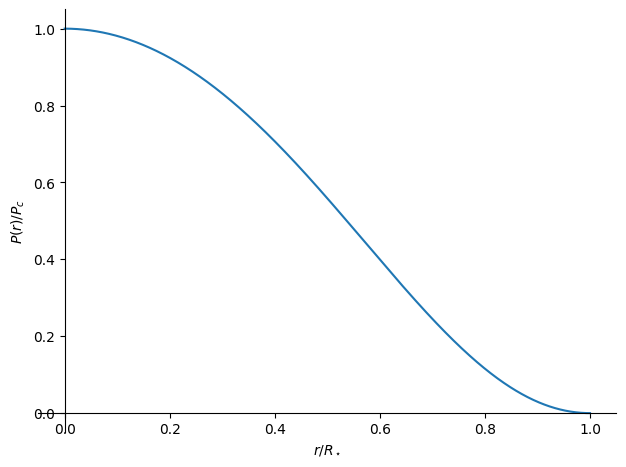

In [43]:
# run these cells below to view our pressure profile.
z = simplify((P / Pc).subs(r, xi * Rstar))
plot(z, (xi, 0, 1), xlabel=r"$r/R_\star$", ylabel=r"$P(r)/P_{c}$")

### 2. - Computing Central Temperature

The central temperature, assuming the ideal gas law, is:

$$T_c = \frac{\mu m_u P_c}{\rho_c k}$$

For our density profile this should be

$$T_c = \frac{21}{40} \frac{G M_\star}{R_\star} \frac{\mu m_u}{k}$$

while for the constant density model, the coefficient was 1/2.

1. Compute $T_c$ symbolically and confirm the coefficient 21/40.

2. Compute a numerical value for the central temperature and compare to the central temperature of the Sun. 

3. 

Okay great, but we still need to know the composition before we can compute the temperature. 

We'll look at two choices here:

In [44]:
# compute Tc here and confirm the prefactor - passing Pc and rhoc_value
Tc = (mu * m_u / k) * (Pc / rhoc_value)
Tc

21⋅G⋅M_\star⋅mᵤ⋅μ
─────────────────
  40⋅R_\star⋅k   

i. pure H composition has $\mu = 1/2$, compute $T_{c}$ for this composition.

In [45]:
mu_cgs = 0.5
m_u_cgs = 1.66e-24
k_cgs = 1.38e-16

Tc.subs(Mstar, msun).subs(mu, mu_cgs).subs(m_u, m_u_cgs).subs(k, k_cgs).subs(
    Rstar, rsun
).subs(G, G_cgs) / 1e7  # units of 10^7 K

0.605208333333333

ii. pure He composition has $\mu = 4/3$

In [46]:
# compute Tc here for this composition
mu_cgs = 4 / 3.0

Tc.subs(Mstar, msun).subs(mu, mu_cgs).subs(m_u, m_u_cgs).subs(k, k_cgs).subs(
    Rstar, rsun
).subs(G, G_cgs) / 1e7  # units of 10^7 K

1.61388888888889

The central pressure for the constant-density model (HKT 1.39) was

$$P_c = \frac{3}{8\pi} \frac{GM_\star^2}{R_\star^4}$$

Here, with the cubic density profile, we find 

$$P_c = \frac{63}{80\pi} \frac{G M_\star^{2}}{R_\star^{4}}$$

The pressure is greater in this model because more mass is concentrated toward the center of the star, increasing the force of gravity throughout, making the outer layers weigh more.

The temperature is the _almost the same_ in both models, since both the central pressure and central density increase by the here.

Let's evaluate $P_c/\rho_c$ for our model

### 3. Comparing the Pressure Profiles to a MS stellar model

1. load the MESA data using pandas, 
2. retrieve the radius and pressure profiles
3. compute the max / central pressure
4. plot the MESA data $r/R_\star$ vs $P(r)/P_c$ and compare directly to our plot for these data using our approximate density profile
5. comment briefly on the difference of the two profiles and think what might be contributing to the difference

In [47]:
# one_m_sun_ms = pd.read_csv('data/M1_default_profile8.data',sep=r'\s+',header=4)
# one_m_sun_ms.columns

In [48]:
# one_m_sun_radius_ms = one_m_sun_ms[#
# one_m_sun_pressure_ms = one_m_sun_ms[#

In [49]:
# one_m_sun_Pc = max(
# one_m_sun_Rstar = max(

In [50]:
# plt.plot(##)
# plt.xlabel('$r/R_\star$');plt.ylabel(r'$P(r)/P_c$')
# plot(z,(xi, 0, 1), xlabel=r"$r/R_\star$", ylabel=r"$P(r)$")

comment on the difference for the two pressure profiles here...